In [3]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to C:\Users\Gaganbir
[nltk_data]     Singh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Gaganbir
[nltk_data]     Singh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Gaganbir
[nltk_data]     Singh\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to C:\Users\Gaganbir
[nltk_data]     Singh\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt_tab to C:\Users\Gaganbir
[nltk_data]     Singh\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


True

In [4]:
#question1
import re
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from collections import Counter

paragraph = "Technology is changing our lives in amazing ways. From smartphones to smart homes, everything is connected. I love exploring new gadgets and apps. They make tasks easier and more fun. Innovation is at the heart of progress."

text_clean = re.sub(r'[^\w\s]', '', paragraph.lower())

words = word_tokenize(text_clean)
sentences = sent_tokenize(paragraph)

print("Split:", text_clean.split())
print("word_tokenize:", words)

stop_words = set(stopwords.words('english'))
filtered_words = [w for w in words if w not in stop_words]

word_freq = Counter(filtered_words)
print("Word Frequencies:", word_freq)

Split: ['technology', 'is', 'changing', 'our', 'lives', 'in', 'amazing', 'ways', 'from', 'smartphones', 'to', 'smart', 'homes', 'everything', 'is', 'connected', 'i', 'love', 'exploring', 'new', 'gadgets', 'and', 'apps', 'they', 'make', 'tasks', 'easier', 'and', 'more', 'fun', 'innovation', 'is', 'at', 'the', 'heart', 'of', 'progress']
word_tokenize: ['technology', 'is', 'changing', 'our', 'lives', 'in', 'amazing', 'ways', 'from', 'smartphones', 'to', 'smart', 'homes', 'everything', 'is', 'connected', 'i', 'love', 'exploring', 'new', 'gadgets', 'and', 'apps', 'they', 'make', 'tasks', 'easier', 'and', 'more', 'fun', 'innovation', 'is', 'at', 'the', 'heart', 'of', 'progress']
Word Frequencies: Counter({'technology': 1, 'changing': 1, 'lives': 1, 'amazing': 1, 'ways': 1, 'smartphones': 1, 'smart': 1, 'homes': 1, 'everything': 1, 'connected': 1, 'love': 1, 'exploring': 1, 'new': 1, 'gadgets': 1, 'apps': 1, 'make': 1, 'tasks': 1, 'easier': 1, 'fun': 1, 'innovation': 1, 'heart': 1, 'progress'

In [5]:
#question2
from nltk.stem import PorterStemmer, WordNetLemmatizer

alpha_words = re.findall(r'\b[a-zA-Z]+\b', text_clean)
filtered_alpha = [word for word in alpha_words if word not in stop_words]

stemmer = PorterStemmer()
stemmed = [stemmer.stem(word) for word in filtered_alpha]

lemmatizer = WordNetLemmatizer()
lemmatized = [lemmatizer.lemmatize(word) for word in filtered_alpha]

print("Stemmed:", stemmed)
print("Lemmatized:", lemmatized)

Stemmed: ['technolog', 'chang', 'live', 'amaz', 'way', 'smartphon', 'smart', 'home', 'everyth', 'connect', 'love', 'explor', 'new', 'gadget', 'app', 'make', 'task', 'easier', 'fun', 'innov', 'heart', 'progress']
Lemmatized: ['technology', 'changing', 'life', 'amazing', 'way', 'smartphones', 'smart', 'home', 'everything', 'connected', 'love', 'exploring', 'new', 'gadget', 'apps', 'make', 'task', 'easier', 'fun', 'innovation', 'heart', 'progress']


In [6]:
#question3
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

texts = [
    "The camera quality is amazing and battery lasts long.",
    "This laptop is lightweight and perfect for travel.",
    "Terrible sound quality in this headphone. Very disappointed."
]

cv = CountVectorizer()
bow = cv.fit_transform(texts)
print("Bag of Words:\n", bow.toarray())

tv = TfidfVectorizer()
tfidf = tv.fit_transform(texts)
feature_names = tv.get_feature_names_out()

for i, text in enumerate(texts):
    print(f"\nText {i+1} top 3 keywords:")
    scores = zip(feature_names, tfidf[i].toarray()[0])
    sorted_scores = sorted(scores, key=lambda x: x[1], reverse=True)
    print([word for word, score in sorted_scores[:3]])

Bag of Words:
 [[1 1 1 1 0 0 0 0 1 0 1 0 1 0 1 0 0 1 0 0 0]
 [0 1 0 0 0 1 0 0 1 1 0 1 0 1 0 0 0 0 1 1 0]
 [0 0 0 0 1 0 1 1 0 0 0 0 0 0 1 1 1 0 1 0 1]]

Text 1 top 3 keywords:
['amazing', 'battery', 'camera']

Text 2 top 3 keywords:
['for', 'laptop', 'lightweight']

Text 3 top 3 keywords:
['disappointed', 'headphone', 'in']


In [7]:
#question4
from sklearn.metrics.pairwise import cosine_similarity

text1 = "Artificial Intelligence is transforming industries with automation and smart decisions."
text2 = "Blockchain ensures secure and transparent transactions in decentralized networks."

def preprocess(text):
    return [w for w in word_tokenize(re.sub(r'[^\w\s]', '', text.lower())) if w not in stop_words]

set1, set2 = set(preprocess(text1)), set(preprocess(text2))

jaccard = len(set1 & set2) / len(set1 | set2)
print("Jaccard Similarity:", jaccard)

tfidf = TfidfVectorizer()
vectors = tfidf.fit_transform([text1, text2])
cos_sim = cosine_similarity(vectors[0:1], vectors[1:2])[0][0]
print("Cosine Similarity:", cos_sim)

Jaccard Similarity: 0.0
Cosine Similarity: 0.05629715757507138


   ---------------------------------------- 0.0/624.3 kB ? eta -:--:--
   --------------------------------------- 624.3/624.3 kB 11.7 MB/s eta 0:00:00
Polarity: 0.4694444444444444
Subjectivity: 0.6
Sentiment: Positive


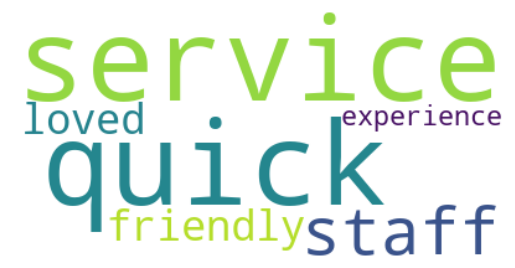

In [9]:
#question5
!pip install textblob wordcloud matplotlib
from textblob import TextBlob
from wordcloud import WordCloud
import matplotlib.pyplot as plt

review = "The service was quick and staff was friendly. I loved the experience."
blob = TextBlob(review)
print("Polarity:", blob.sentiment.polarity)
print("Subjectivity:", blob.sentiment.subjectivity)

sentiment = "Positive" if blob.sentiment.polarity > 0 else "Negative" if blob.sentiment.polarity < 0 else "Neutral"
print("Sentiment:", sentiment)

if sentiment == "Positive":
    wc = WordCloud(background_color='white').generate(review)
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.show()

## Q6: Text Generation using LSTM

In [13]:
!pip install tensorflow
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
import numpy as np

text = "Technology is evolving rapidly and impacting every aspect of our lives. Innovations in AI and machine learning are leading the way. We rely on smart systems for everyday tasks."

tokenizer = Tokenizer()
tokenizer.fit_on_texts([text])
total_words = len(tokenizer.word_index) + 1

input_sequences = []
for line in text.split('.'):
    tokens = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(tokens)):
        input_sequences.append(tokens[:i+1])

max_seq_len = max([len(seq) for seq in input_sequences])
input_sequences = pad_sequences(input_sequences, maxlen=max_seq_len, padding='pre')

X, y = input_sequences[:, :-1], input_sequences[:, -1]
y = np.array(y)

model = Sequential()
model.add(Embedding(input_dim=total_words, output_dim=10))
model.add(LSTM(100))
model.add(Dense(total_words, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam')
model.fit(X, y, epochs=100, verbose=0)

seed = "technology"
next_words = 3
for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed])[0]
    token_list = pad_sequences([token_list], maxlen=max_seq_len-1, padding='pre')
    predicted = model.predict(token_list, verbose=0)
    next_index = np.argmax(predicted)
    next_word = tokenizer.index_word.get(next_index, '')
    seed += ' ' + next_word

print("Generated Text:", seed)

Generated Text: technology is is and
